In [3]:
from magic_gap import *

import matplotlib.pyplot as plt
import pickle

In [4]:
def extract(d_big, d_small, data):
    for _ in data:
        if _["d_big"] == d_big and _["d_small"] == d_small:
            return _

In [5]:
d_big_range = np.arange(3, 10)
qudit_data = []
for d_big in d_big_range:
    for d_small in range(2, d_big):
        D_big = qudit_wh_operators(d_big)
        D_small = qudit_wh_operators(d_small)
        B = np.eye(d_big)[:d_small]
        magic_gap_data = magic_gap(D_big, D_small, B, M=5000, R=10)
        print("d_big: %d, d_small: %d => gap: %.5f +/- %.5f" % (d_big, d_small, magic_gap_data["avg_magic_gap"], magic_gap_data["avg_magic_gap_std"]))
        qudit_data.append(magic_gap_data)
        with open("simple_qudit_magic_gap.pkl", "wb") as f:  
            pickle.dump(qudit_data, f)

d_big: 3, d_small: 2 => gap: 0.20000 +/- 0.00000
d_big: 4, d_small: 2 => gap: 0.20000 +/- 0.00000
d_big: 4, d_small: 3 => gap: 0.06667 +/- 0.00000
d_big: 5, d_small: 2 => gap: 0.20000 +/- 0.00000
d_big: 5, d_small: 3 => gap: 0.13333 +/- 0.00000
d_big: 5, d_small: 4 => gap: 0.08571 +/- 0.00000
d_big: 6, d_small: 2 => gap: 0.20048 +/- 0.00187
d_big: 6, d_small: 3 => gap: 0.13333 +/- 0.00094
d_big: 6, d_small: 4 => gap: 0.11345 +/- 0.00100
d_big: 6, d_small: 5 => gap: 0.04255 +/- 0.00057
d_big: 7, d_small: 2 => gap: 0.20068 +/- 0.00157
d_big: 7, d_small: 3 => gap: 0.13305 +/- 0.00115
d_big: 7, d_small: 4 => gap: 0.14294 +/- 0.00084
d_big: 7, d_small: 5 => gap: 0.08539 +/- 0.00075
d_big: 7, d_small: 6 => gap: 0.04760 +/- 0.00088
d_big: 8, d_small: 2 => gap: 0.20029 +/- 0.00102
d_big: 8, d_small: 3 => gap: 0.13318 +/- 0.00159
d_big: 8, d_small: 4 => gap: 0.14245 +/- 0.00072
d_big: 8, d_small: 5 => gap: 0.10006 +/- 0.00086
d_big: 8, d_small: 6 => gap: 0.07108 +/- 0.00089
d_big: 8, d_small: 7

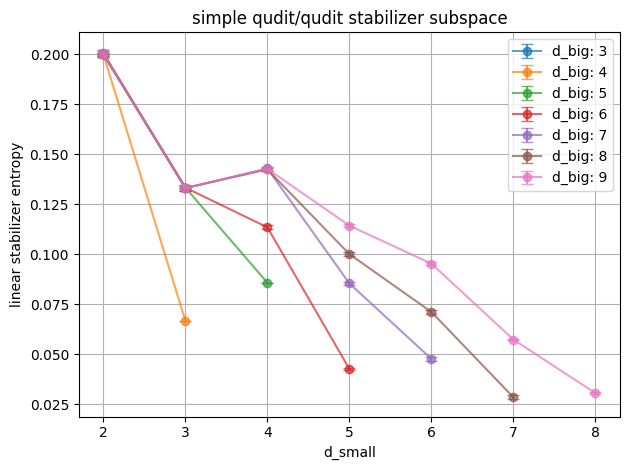

In [6]:
for d_big in d_big_range:
    d_small_range = np.arange(2, d_big)
    avg_magic_gap = []
    avg_magic_gap_std = []
    for d_small in d_small_range:
        data = extract(d_big, d_small, qudit_data)
        avg_magic_gap.append(data["avg_magic_gap"])
        avg_magic_gap_std.append(data["avg_magic_gap_std"])
    plt.errorbar(d_small_range, avg_magic_gap, yerr=avg_magic_gap_std, fmt='-o', capsize=4, alpha=0.7, label='d_big: %d' % d_big)

plt.legend()
plt.title("simple qudit/qudit stabilizer subspace")
plt.xlabel("d_small")
plt.ylabel("linear stabilizer entropy")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
n_qubits_range = np.arange(2, 6)
n_qubit_data = []
for n_qubits in n_qubits_range:
    d_big = 2**n_qubits
    for d_small in range(2, d_big):
        D_big = wh_operators(*[2]*n_qubits)
        D_small = qudit_wh_operators(d_small)
        B = np.eye(d_big)[:d_small]
        magic_gap_data = magic_gap(D_big, D_small, B, M=5000, R=10)
        print("d_big: %d, d_small: %d => gap: %.5f +/- %.5f" % (d_big, d_small, magic_gap_data["avg_magic_gap"], magic_gap_data["avg_magic_gap_std"]))
        n_qubit_data.append(magic_gap_data)
        with open("simple_nqubit_magic_gap.pkl", "wb") as f:  
            pickle.dump(n_qubit_data, f)

d_big: 4, d_small: 2 => gap: 0.00000 +/- 0.00000
d_big: 4, d_small: 3 => gap: 0.00000 +/- 0.00000
d_big: 8, d_small: 2 => gap: -0.00014 +/- 0.00063
d_big: 8, d_small: 3 => gap: 0.00016 +/- 0.00093
d_big: 8, d_small: 4 => gap: -0.05747 +/- 0.00116
d_big: 8, d_small: 5 => gap: 0.01465 +/- 0.00121
d_big: 8, d_small: 6 => gap: 0.00001 +/- 0.00118
d_big: 8, d_small: 7 => gap: -0.03364 +/- 0.00080
d_big: 16, d_small: 2 => gap: 0.00002 +/- 0.00087
d_big: 16, d_small: 3 => gap: -0.00008 +/- 0.00121
d_big: 16, d_small: 4 => gap: -0.05711 +/- 0.00139
d_big: 16, d_small: 5 => gap: 0.01396 +/- 0.00142
d_big: 16, d_small: 6 => gap: 0.00028 +/- 0.00094
d_big: 16, d_small: 7 => gap: -0.03307 +/- 0.00083
d_big: 16, d_small: 8 => gap: -0.06062 +/- 0.00073
d_big: 16, d_small: 9 => gap: -0.00489 +/- 0.00092
d_big: 16, d_small: 10 => gap: 0.01095 +/- 0.00068
d_big: 16, d_small: 11 => gap: 0.00563 +/- 0.00047
d_big: 16, d_small: 12 => gap: -0.00433 +/- 0.00047
d_big: 16, d_small: 13 => gap: -0.01370 +/- 0.

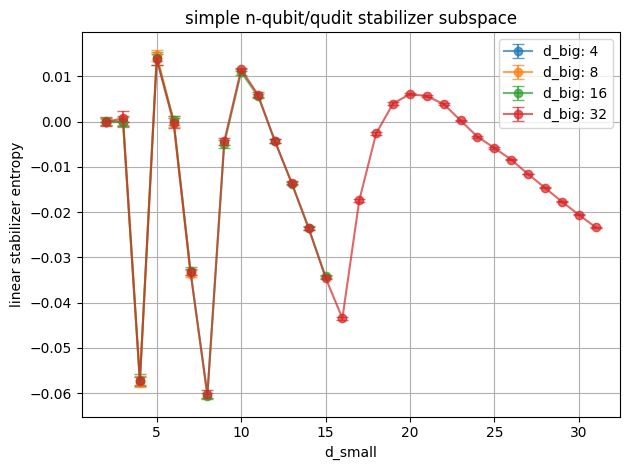

In [15]:
for n_qubits in n_qubits_range:
    d_big = 2**n_qubits
    d_small_range = np.arange(2, d_big)
    avg_magic_gap = []
    avg_magic_gap_std = []
    for d_small in d_small_range:
        data = extract(d_big, d_small, n_qubit_data)
        avg_magic_gap.append(data["avg_magic_gap"])
        avg_magic_gap_std.append(data["avg_magic_gap_std"])
    plt.errorbar(d_small_range, avg_magic_gap, yerr=avg_magic_gap_std, fmt='-o', capsize=4, alpha=0.7, label='d_big: %d' % d_big)

plt.legend()
plt.title("simple n-qubit/qudit stabilizer subspace")
plt.xlabel("d_small")
plt.ylabel("linear stabilizer entropy")
plt.grid(True)
plt.tight_layout()
plt.show()